In [1]:
import pandas as pd 
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc

import pickle

In [2]:
twitter_data = pd.read_csv("twitter_data.csv")  # reading the data
twitter_data

,Unnamed: 0,Tweet
0,0,@Kaceycalhoon Look up Feminique on Amazon 😉
1,1,"@Maryam15048 Report the bug to amazon ""worst p..."
2,2,Just realizing the joy of using the Libby web ...
3,3,@LeftHandedLarue I found a few on my Amazon Pr...
4,4,@RustyScrambles They found out that a high sta...
...,...,...
9874,9995,"@singaramoffl Covide 2nd wave peak time, only ..."
9875,9996,SanDisk SDDD3-064G-I35GW 64 GB OTG Drive .. #F...
9876,9997,@DrRoseStewart \nMorning. My pre order for the...
9877,9998,@miss__Amazon @maaabena_ Please remind me agai...


### Exploring dataset:

In [3]:
twitter_data.isnull().sum()  # checking for null values

Unnamed: 0    0
Tweet         0
dtype: int64

In [4]:
twitter_data.info()   # EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9879 non-null   int64 
 1   Tweet       9879 non-null   object
dtypes: int64(1), object(1)
memory usage: 154.5+ KB


In [5]:
tweets = twitter_data.copy()   # creating a copy

### Data cleaning:

In [6]:
tweets.drop(['Unnamed: 0'],axis = 1,inplace = True)   

In [7]:
# WRITING A FUCTION TO CLEAN THE CONTENT OF THE DATA:

def cleantweet(tweet):
  tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)  # to remove @
  tweet = re.sub(r'#','',tweet)              # to remove hashtags
  tweet = re.sub(r'RT[\s]','',tweet)         # to remove retweets 
  tweet = re.sub(r'https?:\/\/\S+','',tweet) # to remove hyperlinks
  tweet = re.sub(r'[^\w\s]', '', tweet)      # to remove punctuations
  tweet = re.sub(r'\n','',tweet)             # to remove next line 
  tweet = re.sub(r'_','',tweet)              # to remove underscore
  tweet = re.sub(" \d+", "", tweet)          # to remove numericals 
  return tweet 

In [8]:
tweets['content'] = tweets['Tweet'].apply(cleantweet)    # creating a new column
tweets

,Tweet,content
0,@Kaceycalhoon Look up Feminique on Amazon 😉,Look up Feminique on Amazon
1,"@Maryam15048 Report the bug to amazon ""worst p...",Report the bug to amazon worst phone shouldnt...
2,Just realizing the joy of using the Libby web ...,Just realizing the joy of using the Libby web ...
3,@LeftHandedLarue I found a few on my Amazon Pr...,I found a few on my Amazon Prime list that ar...
4,@RustyScrambles They found out that a high sta...,They found out that a high starch fat and sug...
...,...,...
9874,"@singaramoffl Covide 2nd wave peak time, only ...",Covidend wave peak time only days theatrical ...
9875,SanDisk SDDD3-064G-I35GW 64 GB OTG Drive .. #F...,SanDisk SDDD3064GI35GW GB OTG Drive Flipkart ...
9876,@DrRoseStewart \nMorning. My pre order for the...,Morning My pre order for the Kindle Version o...
9877,@miss__Amazon @maaabena_ Please remind me agai...,Amazon Please remind me again PLEASE PLEASE ...


In [9]:
# another function to remove EMOJIS:

def remove_emojis(tweet):
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"                   # emoticons
        u"\U0001F300-\U0001F5FF"                   # symbols & pictographs
        u"\U0001F680-\U0001F6FF"                   # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"                   # flags (iOS)
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)            # substituting emoji with empty string 

In [10]:
tweets['content'] = tweets['content'].apply(remove_emojis)
tweets.content.head(100)

0                          Look up Feminique on Amazon 
1      Report the bug to amazon worst phone shouldnt...
2     Just realizing the joy of using the Libby web ...
3      I found a few on my Amazon Prime list that ar...
4      They found out that a high starch fat and sug...
                            ...                        
95    We are going to have a Amazon gift card giveaw...
96      Havent seen it dont tend to use Amazon if I ...
97      hmm not on my netflix  maybe it expired  on ...
98     it doesnt seam that you guys are worried abou...
99     Hello Just to clarify are you currently havin...
Name: content, Length: 100, dtype: object

In [11]:
# converting all the words in the tweets to lower case:
tweets['content'] = tweets['content'].str.lower()

### Removing Stop words:

In [12]:
!pip install nltk

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')   # for english language

# Making custom list of words to be removed 
add_words = []
# Adding to the list of words
stop_words.extend(add_words)

# Defining a Function to remove stop words 
# take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
tweets['content'] = [remove_stopwords(r) for r in tweets['content']]

### word tokenization + POS tagging + Lemmatization: 

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer() # initialze Lemmatizer

# function to convert nltk tag to wordnet tag
# function for Converting the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
# word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
def lemmatize_sentence(sentence):
    
    # tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    # tuple of (token, wordnet_tag)     # convert detailed POS into shallow POS
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:                
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))     
    return " ".join(lemmatized_sentence)


tweets['content'] = tweets['content'].apply(lambda x: lemmatize_sentence(x))

### Visualizing the frequent words:

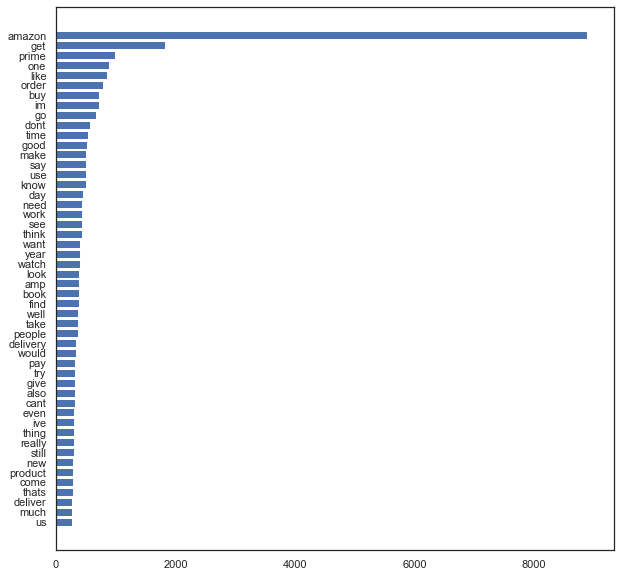

In [16]:
from nltk import FreqDist # function to find the frequent words in the data

# Extracts words into list and count frequency
all_words = ' '.join([text for text in tweets['content']])  # all the rows are joined into a single paragraph
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 50 words by frequency
words_df = words_df.nlargest(columns="count", n = 50) 
words_df.sort_values('count', inplace = True)

# Plotting 50 frequent words
plt.figure(figsize=(10,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [17]:
!pip install WordCloud

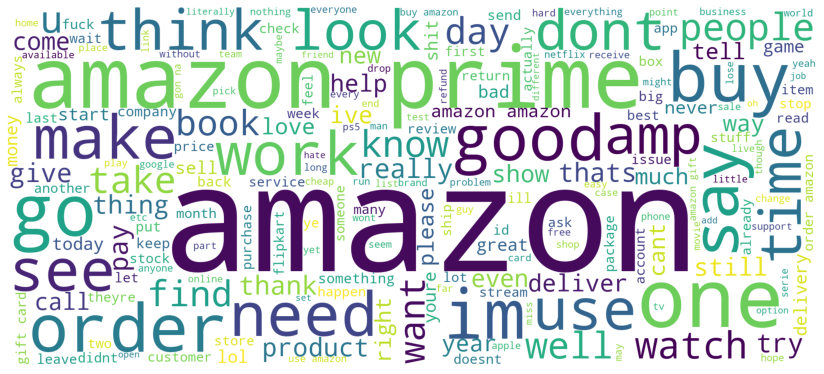

In [18]:
from wordcloud import WordCloud 

all_words = ' '.join([text for text in tweets['content']])
 
wordcloud = WordCloud(width = 1800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

# plot the WordCloud image:                        
plt.figure(figsize = (13,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

###### Interpretation of the above:
    - Amazon, Amazon Prime, good, buy,.. are the most repeated words 

### Finding subjectivity and polarity:

- Polarity is float which lies in the range of [-1,1] 
    - where 1 means positive statement and -1 means a negative statement.
- Subjectivity is also a float which lies in the range of [0,1].
    - The smaller the subjectivity value, the sentence most likely an opinion. The bigger the value, the sentence most likely a factual information.

In [19]:
!pip install textblob

In [20]:
from textblob import TextBlob as tb

In [21]:
# defining function to get subjectivity:
def subjectivity(tweet):                   
  return tb(tweet).sentiment.subjectivity

In [22]:
tweets['Subjectivity'] = tweets['content'].apply(subjectivity)   # creating new column

In [23]:
tweets

,Tweet,content,Subjectivity
0,@Kaceycalhoon Look up Feminique on Amazon 😉,look feminique amazon,0.000000
1,"@Maryam15048 Report the bug to amazon ""worst p...",report bug amazon bad phone shouldnt level pas...,0.483333
2,Just realizing the joy of using the Libby web ...,realize joy use libby web app kindle fire nati...,0.600000
3,@LeftHandedLarue I found a few on my Amazon Pr...,find amazon prime list leave today tomorrow le...,0.534375
4,@RustyScrambles They found out that a high sta...,find high starch fat sugar diet lethargic sede...,0.557063
...,...,...,...
9874,"@singaramoffl Covide 2nd wave peak time, only ...",covidend wave peak time day theatrical run occ...,0.000000
9875,SanDisk SDDD3-064G-I35GW 64 GB OTG Drive .. #F...,sandisk sddd3064gi35gw gb otg drive flipkart a...,0.625000
9876,@DrRoseStewart \nMorning. My pre order for the...,morning pre order kindle version diabetes burn...,0.400000
9877,@miss__Amazon @maaabena_ Please remind me agai...,amazon please remind please please please,0.000000


In [24]:
# defining function to get polarity:
def polarity(tweet):
  return tb(tweet).sentiment.polarity

In [25]:
tweets['Polarity'] = tweets['content'].apply(polarity)     # creating new column

In [26]:
tweets

,Tweet,content,Subjectivity,Polarity
0,@Kaceycalhoon Look up Feminique on Amazon 😉,look feminique amazon,0.000000,0.000000
1,"@Maryam15048 Report the bug to amazon ""worst p...",report bug amazon bad phone shouldnt level pas...,0.483333,0.150000
2,Just realizing the joy of using the Libby web ...,realize joy use libby web app kindle fire nati...,0.600000,0.700000
3,@LeftHandedLarue I found a few on my Amazon Pr...,find amazon prime list leave today tomorrow le...,0.534375,-0.065625
4,@RustyScrambles They found out that a high sta...,find high starch fat sugar diet lethargic sede...,0.557063,0.279841
...,...,...,...,...
9874,"@singaramoffl Covide 2nd wave peak time, only ...",covidend wave peak time day theatrical run occ...,0.000000,0.000000
9875,SanDisk SDDD3-064G-I35GW 64 GB OTG Drive .. #F...,sandisk sddd3064gi35gw gb otg drive flipkart a...,0.625000,0.500000
9876,@DrRoseStewart \nMorning. My pre order for the...,morning pre order kindle version diabetes burn...,0.400000,0.400000
9877,@miss__Amazon @maaabena_ Please remind me agai...,amazon please remind please please please,0.000000,0.000000


In [27]:
final_tweets = tweets[['content','Subjectivity','Polarity']]   # taking only necessary features
final_tweets

,content,Subjectivity,Polarity
0,look feminique amazon,0.000000,0.000000
1,report bug amazon bad phone shouldnt level pas...,0.483333,0.150000
2,realize joy use libby web app kindle fire nati...,0.600000,0.700000
3,find amazon prime list leave today tomorrow le...,0.534375,-0.065625
4,find high starch fat sugar diet lethargic sede...,0.557063,0.279841
...,...,...,...
9874,covidend wave peak time day theatrical run occ...,0.000000,0.000000
9875,sandisk sddd3064gi35gw gb otg drive flipkart a...,0.625000,0.500000
9876,morning pre order kindle version diabetes burn...,0.400000,0.400000
9877,amazon please remind please please please,0.000000,0.000000


In [28]:
final_tweets['Polarity'].describe()    # statistical EDA on polarity

count    9879.000000
mean        0.072225
std         0.284980
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.000000
Name: Polarity, dtype: float64

In [29]:
# a function to convert Polarity into positive, negative and neutral terms:

def tweetanalysis(polarity):
  if polarity == 0:
    return 'neutral'
  elif polarity < 0 :
    return 'negative' 
  else:
    return 'positive' 

In [30]:
final_tweets['Analysis'] = final_tweets['Polarity'].apply(tweetanalysis)   # creating a new column

In [31]:
final_tweets

,content,Subjectivity,Polarity,Analysis
0,look feminique amazon,0.000000,0.000000,neutral
1,report bug amazon bad phone shouldnt level pas...,0.483333,0.150000,positive
2,realize joy use libby web app kindle fire nati...,0.600000,0.700000,positive
3,find amazon prime list leave today tomorrow le...,0.534375,-0.065625,negative
4,find high starch fat sugar diet lethargic sede...,0.557063,0.279841,positive
...,...,...,...,...
9874,covidend wave peak time day theatrical run occ...,0.000000,0.000000,neutral
9875,sandisk sddd3064gi35gw gb otg drive flipkart a...,0.625000,0.500000,positive
9876,morning pre order kindle version diabetes burn...,0.400000,0.400000,positive
9877,amazon please remind please please please,0.000000,0.000000,neutral


In [32]:
final_tweets.Polarity.replace(0,np.nan,inplace=True)   # in order to drop neutral reviews
final_tweets.head()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,content,Subjectivity,Polarity,Analysis
0,look feminique amazon,0.000000,NaN,neutral
1,report bug amazon bad phone shouldnt level pas...,0.483333,0.150000,positive
2,realize joy use libby web app kindle fire nati...,0.600000,0.700000,positive
3,find amazon prime list leave today tomorrow le...,0.534375,-0.065625,negative
4,find high starch fat sugar diet lethargic sede...,0.557063,0.279841,positive


In [33]:
final_tweets.dropna(inplace = True)    # dropping neutral reviews

# Deriving the insights into the data:

In [46]:
def delivery(x):
    if 'delivery' in x:
        return '1'
    else:
        return '0'
    
def service(x):
    if 'service' in x:
        return '1'
    else:
        return '0'

def product(x):
    if 'product' in x:
        return '1'
    else:
        return '0'

def experience(x):
    if 'experience' in x:
        return '1'
    else:
        return '0'
    
def amazon(x):
    if 'amazon' in x:
        return '1'
    else:
        return '0'
    
def flipkart(x):
    if 'flipkart' in x:
        return '1'
    else:
        return '0'

def myntra(x):
    if 'myntra' in x:
        return '1'
    else:
        return '0'

def ajio(x):
    if 'ajio' in x:
        return '1'
    else:
        return '0'

In [35]:
final_tweets['Delivery'] = final_tweets['content'].apply(delivery)
final_tweets['Service'] = final_tweets['content'].apply(service)
final_tweets['Product'] = final_tweets['content'].apply(product)
final_tweets['Experience'] = final_tweets['content'].apply(experience)

In [47]:
final_tweets['Amazon'] = final_tweets['content'].apply(amazon)
final_tweets['Flipkart'] = final_tweets['content'].apply(flipkart)
final_tweets['Myntra'] = final_tweets['content'].apply(myntra)
final_tweets['Ajio'] = final_tweets['content'].apply(ajio)

In [48]:
final_tweets

,content,Subjectivity,Polarity,Analysis,Delivery,Service,Product,Experience,Amazon,Flipkart,Myntra,Ajio
1,report bug amazon bad phone shouldnt level pas...,0.483333,0.150000,positive,0,0,0,0,1,0,0,0
2,realize joy use libby web app kindle fire nati...,0.600000,0.700000,positive,0,0,0,0,1,0,0,0
3,find amazon prime list leave today tomorrow le...,0.534375,-0.065625,negative,0,0,0,0,1,0,0,0
4,find high starch fat sugar diet lethargic sede...,0.557063,0.279841,positive,0,0,0,0,1,0,0,0
6,thats insane contact bike company see send rep...,1.000000,-1.000000,negative,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9870,twitter become addictionnetflix addictionamazo...,0.888889,0.500000,positive,0,0,0,0,1,0,0,0
9871,many amazon even verified purchaser strange th...,0.487500,0.262500,positive,0,0,0,0,1,0,0,0
9872,buy wireless charger expensive amazon,0.700000,-0.500000,negative,0,0,0,0,1,0,0,0
9875,sandisk sddd3064gi35gw gb otg drive flipkart a...,0.625000,0.500000,positive,0,0,0,0,0,1,0,0


###### checking the values counts:

In [60]:
for i in range(4,12):
    print("\n",final_tweets[final_tweets.columns[i]].value_counts())


 0    5843
1     223
Name: Delivery, dtype: int64

 0    5882
1     184
Name: Service, dtype: int64

 0    5888
1     178
Name: Product, dtype: int64

 0    5987
1      79
Name: Experience, dtype: int64

 1    5349
0     717
Name: Amazon, dtype: int64

 0    5965
1     101
Name: Flipkart, dtype: int64

 0    6028
1      38
Name: Myntra, dtype: int64

 0    6012
1      54
Name: Ajio, dtype: int64


###### deriving the insights (particular brand):

In [119]:
def datafram(x,y,z):
    df1 = final_tweets.loc[:,[x,y,z]]
    df1.replace('0',np.nan,inplace=True)
    df1.dropna(inplace=True)
    
    sns.countplot(x=z, data=df1)
    plt.title(x + ' '+ y + ' ' +' REVIEWS')

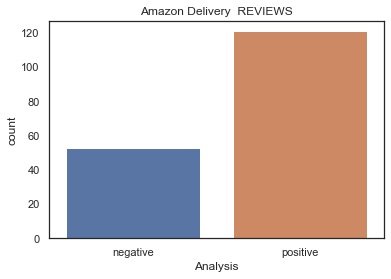

In [120]:
datafram('Amazon','Delivery','Analysis')

###### Interpretation of  Amazon Delivery Experience:
- Positive reviews > Negative reviews
- hence, Delivery is good

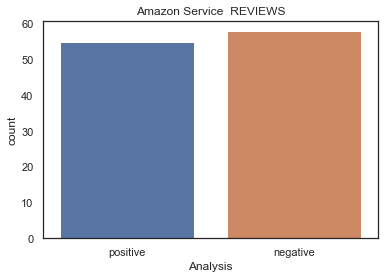

In [121]:
datafram('Amazon','Service','Analysis')

###### Interpretation of Amazon Service reviews:
- Negative reviews = Positive reviews
- hence Service needs to be improved

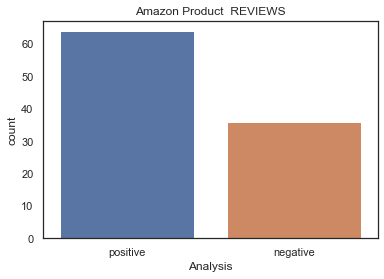

In [122]:
datafram('Amazon','Product','Analysis')

###### Interpretation of Amazon Product reviews:
- Positive reviews > Negative reviews
- hence, quality of products are good

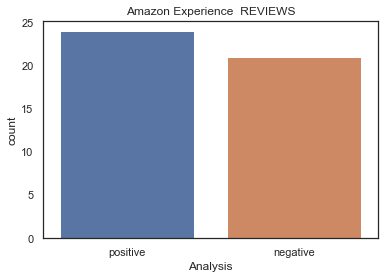

In [123]:
datafram('Amazon','Experience','Analysis')

###### Interpretation of Amazon overall Experience:
    - Positive reviews are slightly greater than Negative reviews
    - needs improvements here

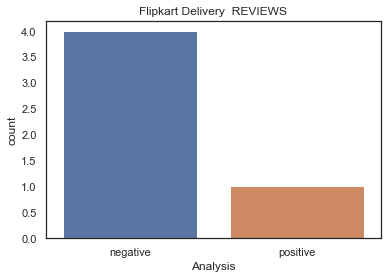

In [124]:
datafram('Flipkart','Delivery','Analysis')

###### Interpretation of Flipkart Deliver review:
- Positive reviews < Negative reviews
- needs larger improvements

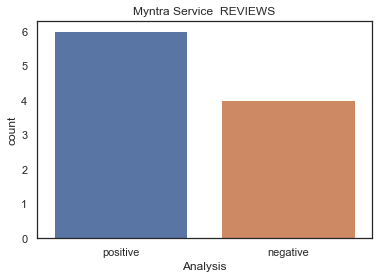

In [125]:
datafram('Myntra','Service','Analysis')

###### Interpretation of Myntra Service review:
- Positive reviews > Negative reviews

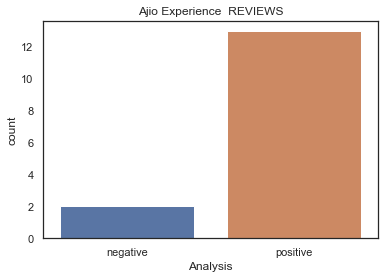

In [126]:
datafram('Ajio','Experience','Analysis')

###### Interpretation of Ajio overall Experience review:
- Positive reviews > Negative reviews
- customer experience is excellent

#### Similarly we can get insights regarding all companies on all factors

### Data Preprocessing:

In [35]:
# Encoding:
le = LabelEncoder()
final_tweets['Target'] = le.fit_transform(final_tweets['Analysis'])   # creating Target variable
final_tweets.head()

,content,Subjectivity,Polarity,Analysis,Target
1,report bug amazon bad phone shouldnt level pas...,0.483333,0.150000,positive,1
2,realize joy use libby web app kindle fire nati...,0.600000,0.700000,positive,1
3,find amazon prime list leave today tomorrow le...,0.534375,-0.065625,negative,0
4,find high starch fat sugar diet lethargic sede...,0.557063,0.279841,positive,1
6,thats insane contact bike company see send rep...,1.000000,-1.000000,negative,0


In [36]:
final_tweets.reset_index(drop=True)   # resetting index

,content,Subjectivity,Polarity,Analysis,Target
0,report bug amazon bad phone shouldnt level pas...,0.483333,0.150000,positive,1
1,realize joy use libby web app kindle fire nati...,0.600000,0.700000,positive,1
2,find amazon prime list leave today tomorrow le...,0.534375,-0.065625,negative,0
3,find high starch fat sugar diet lethargic sede...,0.557063,0.279841,positive,1
4,thats insane contact bike company see send rep...,1.000000,-1.000000,negative,0
...,...,...,...,...,...
6061,twitter become addictionnetflix addictionamazo...,0.888889,0.500000,positive,1
6062,many amazon even verified purchaser strange th...,0.487500,0.262500,positive,1
6063,buy wireless charger expensive amazon,0.700000,-0.500000,negative,0
6064,sandisk sddd3064gi35gw gb otg drive flipkart a...,0.625000,0.500000,positive,1


In [37]:
# seperating X and Y
X = final_tweets.content
Y = final_tweets.Target

In [38]:
# Splitting the data in to training and testing
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 8) 

In [39]:
x_train

9392    book isnt release late spring bookstore amazon...
1361    one half month receive refund till two complai...
3533    amazon iknowwhatyoudidlastsummer problematic p...
1001    whew crazy amazon consist go straight star see...
5277    one point stock high amazon doesnt feel much c...
                              ...                        
3460                          even bad movie amazon prime
3866    martin rewatching currently canada thank amazo...
3220    p lose along time ago microsoft aim top two ca...
2136    sky cant get dart amazon delay buffer wonder p...
7400    random imo rare shit find amazon like oo get t...
Name: content, Length: 4852, dtype: object

In [40]:
x_test

3791    question amazon primeskybt get keep broadcast ...
7825    thats help thanks order flipkart think custome...
4592    hasnt mall downtown lifetime certain youd stil...
6044    sure think gimmick part deliveroo sway public ...
3601    leave review justice amazon review right would...
                              ...                        
1894    ive always positive thing say amazon prime don...
7273    utterly disappointed poor customer service not...
4548    bro use pull amber house wit android blast mus...
9809    flipkart want time make fake assurance make fo...
5217    get one gel face mask amazon something put fre...
Name: content, Length: 1214, dtype: object

In [41]:
# Transforming the data usign th Tf-IDF Vectorizer: 
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(x_train)

TfidfVectorizer(stop_words='english')

In [42]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

### Modelling using Random Forest Classifier:

In [43]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [44]:
# predictions:
y_predict = randomclassifier.predict(x_test)

In [45]:
y_predict

array([1, 1, 0, ..., 0, 0, 1])

In [46]:
# Metrics:

matrix=confusion_matrix(y_test,y_predict)
print("confusion matrix:\n", matrix)

score=accuracy_score(y_test,y_predict)
print("\naccuracy score: ", score)

report=classification_report(y_test,y_predict)
print("\nclassification report:\n",report)

confusion matrix:
 [[272 127]
 [ 34 781]]

accuracy score:  0.8673805601317958

classification report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       399
           1       0.86      0.96      0.91       815

    accuracy                           0.87      1214
   macro avg       0.87      0.82      0.84      1214
weighted avg       0.87      0.87      0.86      1214



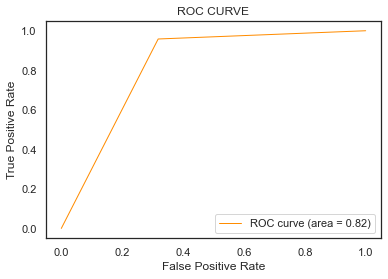

In [47]:
# plotting ROC curv

fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

###### Interpretation of the metrics:
    - In confusion matrix, problem is in false positives. Remaining are all good.
    - Accuracy of 87% is very good
    - Aucroc score of 82% shows that the prediction is good

### Pickle:

In [48]:
filename = 'Sentiment_analysis.pkl'
pickle.dump(randomclassifier,open(filename,'wb'))   # pickle the model

In [49]:
filename = 'transformer.pkl'
pickle.dump(vectorizer,open(filename,'wb'))      # pickle the vectorizer

In [ ]:
# !pip freeze requirements.txt